## Business Understanding
## Data Understanding
## Overview


#### Load Data

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score , classification_report

In [23]:
stroke_df = pd.read_csv('brain_stroke.csv')
stroke_df.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [18]:
def load_and_inspect_data(file_path):
    # Load the data
    df = pd.read_csv(file_path)
    
    # Get the shape of the DataFrame
    shape = df.shape
    print("Shape of the DataFrame:", shape)
    
    # Get information about the DataFrame
    print("\nInfo about the DataFrame:")
    df.info()
    
    # Get descriptive statistics of the DataFrame
    print("\nDescriptive statistics of the DataFrame:")
    description = df.describe()
    print(description)
    
    return df

# Example usage:
file_path = 'brain_stroke.csv'
stroke_df = load_and_inspect_data(file_path)


Shape of the DataFrame: (4981, 11)

Info about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB

Descriptive statistics of the DataFrame:
               age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.00000

In [20]:
stroke_df.duplicated().sum()

0

In [22]:
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [28]:
stroke_df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

The dataset is clearly imbalanced 

### Data Visualization

We will start with checking the distribution of the numerical variables

In [35]:
stroke_df_num = stroke_df[['age','avg_glucose_level', 'bmi']]
# Plot histograms for numerical features against 'stroke'
for feature in stroke_df_num.columns[:-1]:  # Exclude 'stroke' from the loop
    plt.figure(figsize=(10, 6))
    sns.histplot(data=stroke_df_num, x=feature, hue='stroke', palette='husl', multiple='stack')
    plt.title(f'Distribution of {feature} by Stroke')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Stroke', labels=['No', 'Yes'])
    plt.show()

ValueError: Could not interpret value `stroke` for parameter `hue`

<Figure size 720x432 with 0 Axes>

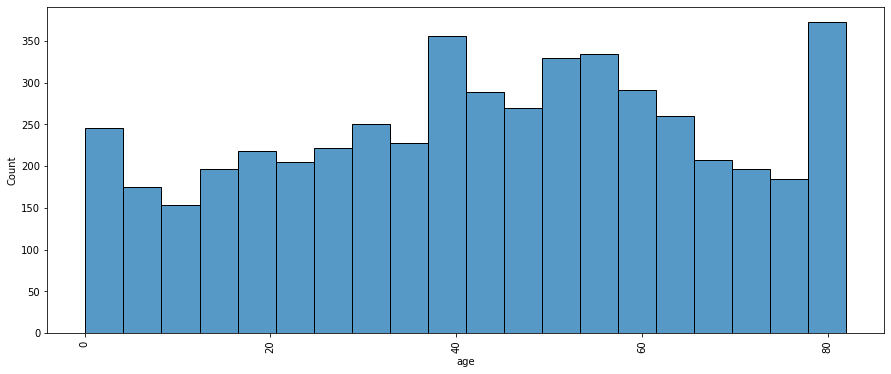

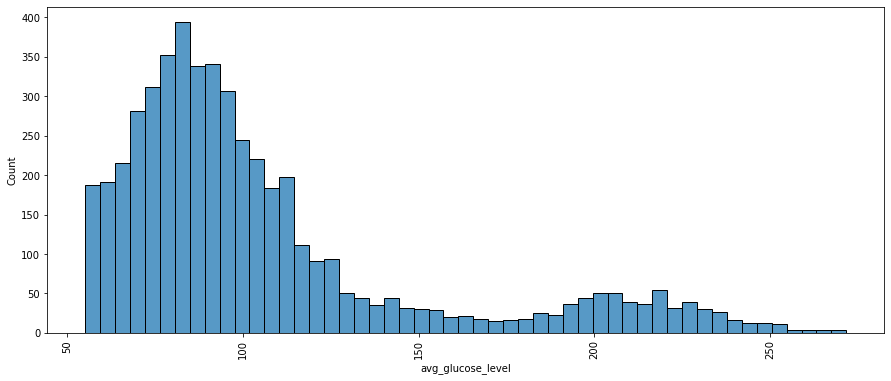

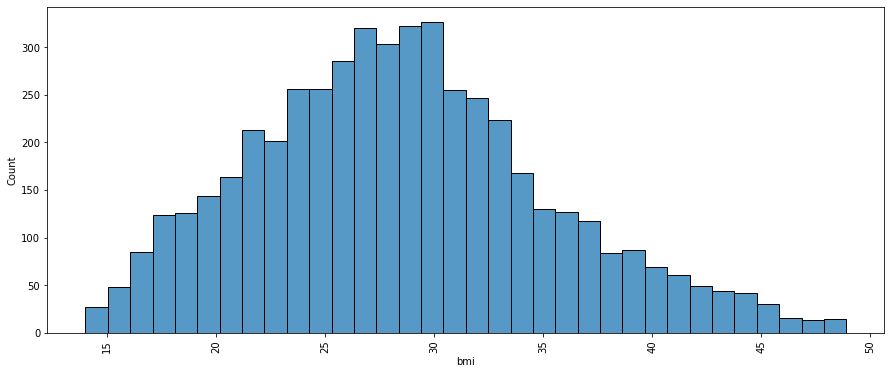

In [30]:
stroke_df_num = stroke_df[['age','avg_glucose_level', 'bmi']]


for i in stroke_df_num.columns:
    plt.figure(figsize = (15,6))
    sns.histplot(stroke_df_num[i], palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

### Categorical Variables 
We will check how the categorical variables relate with the dependent variable

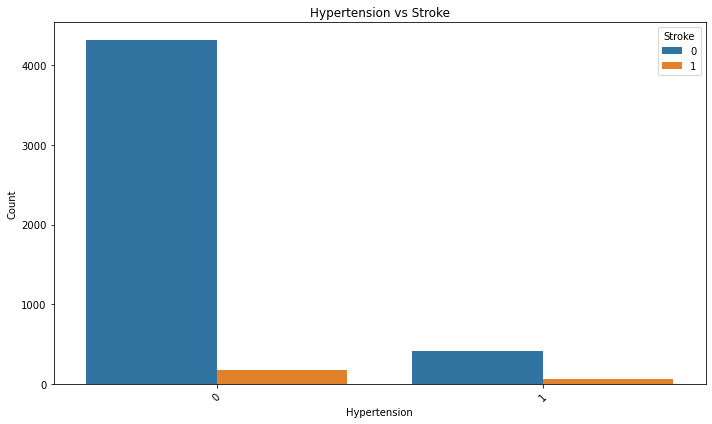

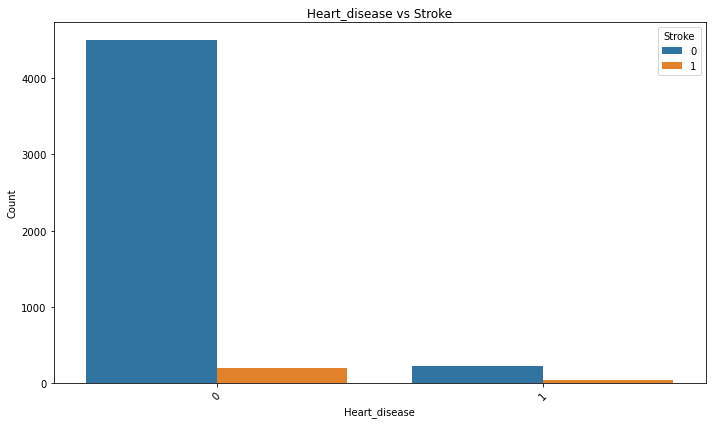

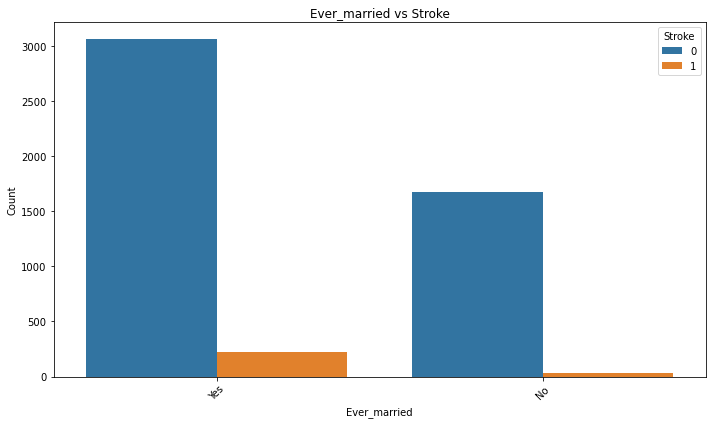

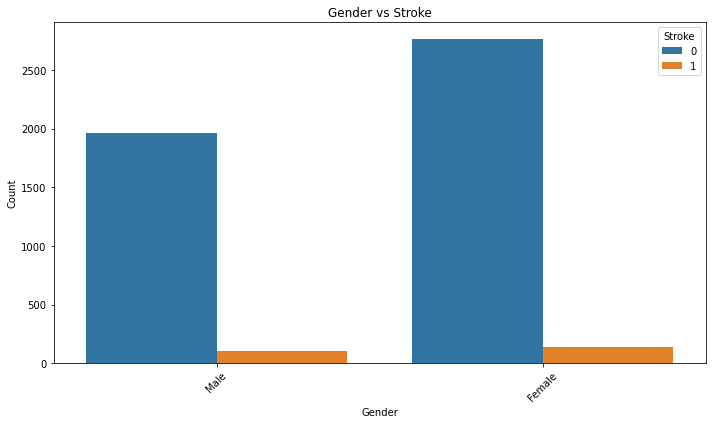

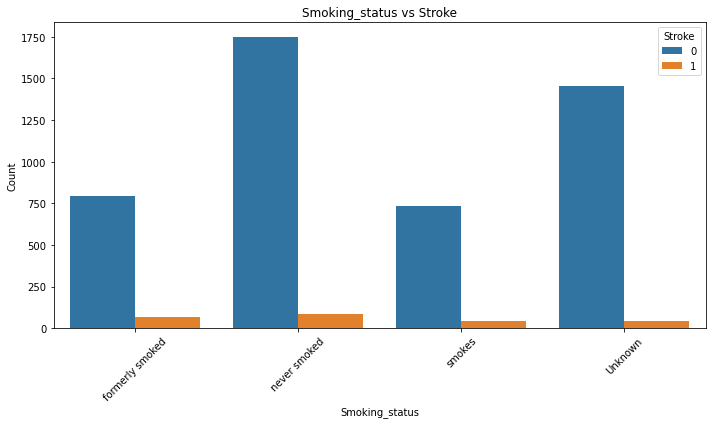

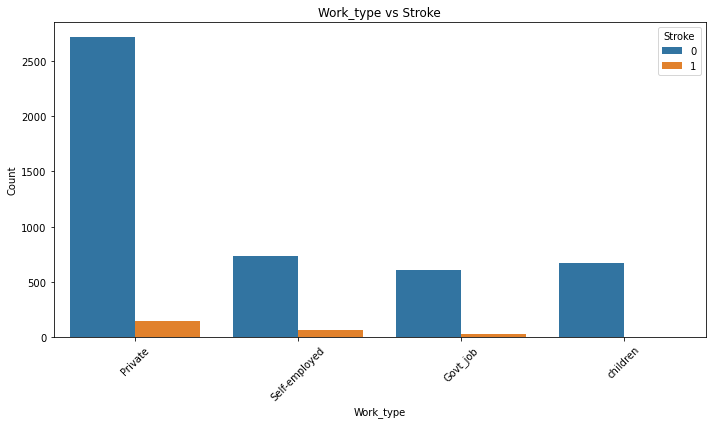

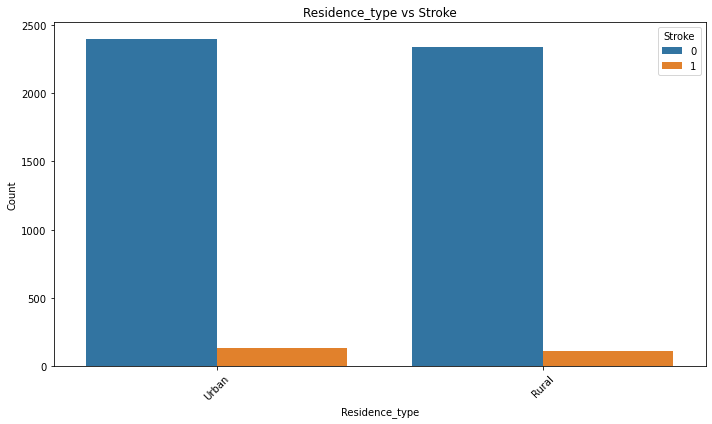

In [32]:
categorical_columns = ['hypertension', 'heart_disease', 'ever_married', 'gender', 'smoking_status', 'work_type', 'Residence_type']

# Loop through each categorical column and create a count plot
for column in categorical_columns:
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    sns.countplot(x=column, hue='stroke', data=stroke_df)
    plt.title(f'{column.capitalize()} vs Stroke')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Stroke', loc='upper right')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.tight_layout()
    plt.show()
